In [1]:
import sys
sys.path.append('../scripts')

In [2]:
sys.path

['',
 '/home/ubuntu/anaconda3/lib/python34.zip',
 '/home/ubuntu/anaconda3/lib/python3.4',
 '/home/ubuntu/anaconda3/lib/python3.4/plat-linux',
 '/home/ubuntu/anaconda3/lib/python3.4/lib-dynload',
 '/home/ubuntu/anaconda3/lib/python3.4/site-packages/Sphinx-1.2.3-py3.4.egg',
 '/home/ubuntu/anaconda3/lib/python3.4/site-packages/setuptools-18.4-py3.4.egg',
 '/home/ubuntu/anaconda3/lib/python3.4/site-packages',
 '/home/ubuntu/anaconda3/lib/python3.4/site-packages/cryptography-0.9.3-py3.4-linux-x86_64.egg',
 '/home/ubuntu/anaconda3/lib/python3.4/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython',
 '../scripts']

In [4]:
import pandas as pd

In [5]:
data = pd.read_hdf('../data/test_train.hdf')


In [6]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [7]:
data.head(2)

,text,target
0,this place was delicious my parents saw a rec...,1
1,cant miss stop for the best fish sandwich in p...,1


In [8]:
vect = TfidfVectorizer()
X = vect.fit_transform(data.text)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.text, data.target,
                                                     test_size=.1, random_state=123)

In [12]:
params = {"tfidf__ngram_range": [(1, 1), (1, 2)],
          "svc__C": [.01, .1, 1, 10, 100]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                ("svc", LinearSVC())])

gs = GridSearchCV(clf, params, verbose=2, n_jobs=-1)


In [13]:
gs.fit(data.text, data.target)
print(gs.best_estimator_)
print(gs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  16 out of  30 | elapsed: 15.2min remaining: 13.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 51.1min finished


Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
0.849640682113
[CV] tfidf__ngram_range=(1, 1), svc__C=0.01 ..........................
[CV] tfidf__ngram_range=(1, 1), svc__C=0.01 ..........................
[CV] tfidf__ngram_range=(1, 1), svc__C=0.01 ..........................
[CV] tfidf__ngram_range=(1, 2), svc__C=0.01 ..........................
[CV] tfidf__ngram_range=(1, 2), svc__C=0.01 ..........................
[CV] tfidf__ngram_range=(1, 2), svc__C=0.01 ..........................
[CV] tfidf__ngram_range=(1, 1), svc__C=0.1 ...........................
[CV] tfidf__ngram_range=(1, 1), svc__C=0.1 ...........................
[CV

2

In [125]:
model = clf.fit(sample_X, sample_y)

time: 356 ms


In [126]:
pred_y = model.predict(X[10000:20000])

time: 20.9 ms


In [127]:
len(pred_y), len(data.target[10000:20000])

(10000, 10000)

time: 2.46 ms


In [131]:
model.score(X[10000:20000], data.target[10000:20000])

0.75839999999999996

time: 15.3 ms


In [24]:
from sklearn.metrics import confusion_matrix

In [161]:
confusion_matrix(data.target[10000:20000],pred_y)

array([[1558,  264,  320],
       [ 350,  525,  963],
       [ 173,  346, 5501]])

time: 11.8 ms


In [162]:
cm = confusion_matrix(data.target[10000:20000],pred_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

time: 10.5 ms


In [20]:
%pylab inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.target.unique()))
    plt.xticks(tick_marks, [-1,0,1], rotation=45)
    plt.yticks(tick_marks, [-1,0,1])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


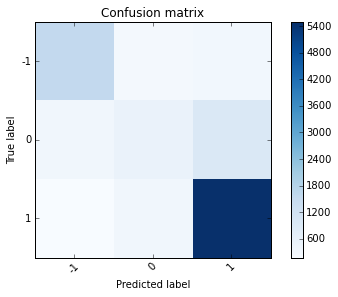

time: 294 ms


In [167]:
plot_confusion_matrix(cm)

In [165]:
cm_normalized

array([[ 0.72735761,  0.1232493 ,  0.14939309],
       [ 0.19042437,  0.28563656,  0.52393906],
       [ 0.02873754,  0.05747508,  0.91378738]])

time: 2.46 ms


In [163]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

time: 1.1 ms


/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


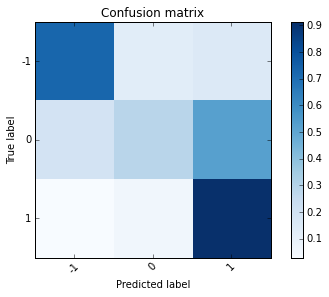

time: 238 ms


In [166]:
plot_confusion_matrix(cm_normalized)

In [144]:
model.coef_

array([[-0.38509716,  0.09841498,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79482294,  0.22374908,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.50053328, -0.32161243,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

time: 2.16 ms


In [67]:
from sklearn.linear_model import RidgeClassifier

time: 873 µs


In [15]:
from sklearn.externals import joblib

In [17]:
joblib.dump(gs, '../model/svc.pkl')

['../model/svc.pkl',
 '../model/svc.pkl_01.npy',
 '../model/svc.pkl_02.npy',
 '../model/svc.pkl_03.npy',
 '../model/svc.pkl_04.npy',
 '../model/svc.pkl_05.npy',
 '../model/svc.pkl_06.npy',
 '../model/svc.pkl_07.npy',
 '../model/svc.pkl_08.npy',
 '../model/svc.pkl_09.npy',
 '../model/svc.pkl_10.npy',
 '../model/svc.pkl_11.npy',
 '../model/svc.pkl_12.npy',
 '../model/svc.pkl_13.npy',
 '../model/svc.pkl_14.npy',
 '../model/svc.pkl_15.npy']

In [ ]:
RidgeClassifierCV

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
    vect = TfidfVectorizer()
    X = vect.fit_transform(data.text)
def train_rf_reg(data):

    print('finished vectorizing')
    rf = RandomForestRegressor(n_estimators=100, max_features='sqrt',
                              oob_score=True, n_jobs=-1, min_samples_leaf=4)
    return rf.fit(X, data.target)
    

In [19]:
gs.score(X_test, y_test)

0.89345164188445736

In [18]:
print(gs.best_estimator_)


Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])


In [22]:
pred_y = gs.predict(X_test)

In [25]:
cm = confusion_matrix(y_test,pred_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

/home/ubuntu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


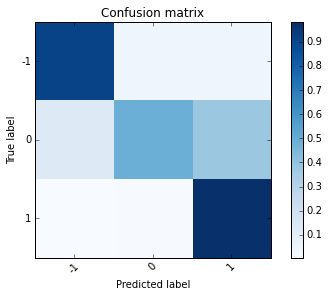

In [26]:
plot_confusion_matrix(cm_normalized)

In [28]:
X_train.head(2)

59319     fast drive through just before 5pm got everyth...
632018    worse servicefood ever dont spend your money t...
Name: text, dtype: object

In [30]:
joblib.dump(vect, '../vect.pkl')

['../vect.pkl', '../vect.pkl_01.npy', '../vect.pkl_02.npy']

In [39]:
text = ['Apple Pie tasty'.lower()]

In [43]:
text

['apple pie tasty']

In [40]:
test_review = vect.transform(text)

In [42]:
test_review

<1x540472 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
%pdb on
gs.predict(test_review)

In [ ]:
2